In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [3]:
# Load the dataset
data = pd.read_csv('diabetic_data.csv', na_values=['NA','?','None'])
data

/var/folders/6f/hrr6km6x5l39n_12_r7994t00000gn/T/ipykernel_2692/1736140095.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('diabetic_data.csv', na_values=['NA','?','None'])


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [4]:
# Display of the first few rows of the dataset to understand its structure
print(data.head())

   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)    NaN   
1        149190     55629189        Caucasian  Female  [10-20)    NaN   
2         64410     86047875  AfricanAmerican  Female  [20-30)    NaN   
3        500364     82442376        Caucasian    Male  [30-40)    NaN   
4         16680     42519267        Caucasian    Male  [40-50)    NaN   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

In [5]:
#To check the shape of data 
print(data.shape)

(101766, 50)


In [6]:
# Basic statistics of the dataset
print(data.describe())

       encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.00000

In [7]:
#Seeing the summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [8]:
# Checking for any missing values
print(data.isnull().sum())

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [9]:
# To remove the column
columns_to_remove = ['weight', 'max_glu_serum', 'A1Cresult', 'race', 'encounter_id']

# Remove specific columns
data_cleaned = data.drop(columns=columns_to_remove)

# Showing the data Shape 
data_cleaned.shape

(101766, 45)

In [10]:
# Identify numerical and categorical columns
numerical_columns = data_cleaned.select_dtypes(include=['number']).columns
categorical_columns = data_cleaned.select_dtypes(include=['object', 'float']).columns


#Printing the Columns 
print("Numerical Columns:")
print(numerical_columns)
print("Categorical Columns:")
print(categorical_columns)

Numerical Columns:
Index(['patient_nbr', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses'],
      dtype='object')
Categorical Columns:
Index(['gender', 'age', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2',
       'diag_3', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [11]:
# preprocessing the Data 
# preprocessing for numerical and categorical data
from sklearn.impute import SimpleImputer

# Preprocessing the Numerical data and imputeing the mean  
imputer = SimpleImputer(strategy='mean')
data_cleaned[numerical_columns] = imputer.fit_transform(data_cleaned[numerical_columns])

# Preprocessing the Catogareical data and imputeing most frequent 
imputer = SimpleImputer(strategy='most_frequent')
data_cleaned[categorical_columns] = imputer.fit_transform(data_cleaned[categorical_columns])

# veiwing the preprocessed data 
print(data_cleaned.head())

/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Ch

   patient_nbr  gender      age  admission_type_id  discharge_disposition_id  \
0    8222157.0  Female   [0-10)                6.0                      25.0   
1   55629189.0  Female  [10-20)                1.0                       1.0   
2   86047875.0  Female  [20-30)                1.0                       1.0   
3   82442376.0    Male  [30-40)                1.0                       1.0   
4   42519267.0    Male  [40-50)                1.0                       1.0   

   admission_source_id  time_in_hospital payer_code         medical_specialty  \
0                  1.0               1.0         MC  Pediatrics-Endocrinology   
1                  7.0               3.0         MC          InternalMedicine   
2                  7.0               2.0         MC          InternalMedicine   
3                  7.0               2.0         MC          InternalMedicine   
4                  7.0               1.0         MC          InternalMedicine   

   num_lab_procedures  ...  cito

In [12]:
# Seeing the summary after dealing the missing values 
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   patient_nbr               101766 non-null  float64
 1   gender                    101766 non-null  object 
 2   age                       101766 non-null  object 
 3   admission_type_id         101766 non-null  float64
 4   discharge_disposition_id  101766 non-null  float64
 5   admission_source_id       101766 non-null  float64
 6   time_in_hospital          101766 non-null  float64
 7   payer_code                101766 non-null  object 
 8   medical_specialty         101766 non-null  object 
 9   num_lab_procedures        101766 non-null  float64
 10  num_procedures            101766 non-null  float64
 11  num_medications           101766 non-null  float64
 12  number_outpatient         101766 non-null  float64
 13  number_emergency          101766 non-null  f

In [13]:
# Checkinng the missing values after the imputation 
print(data_cleaned.isnull().sum())

patient_nbr                 0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

In [14]:
print("Showing the statistics of the data:")
print(data_cleaned[numerical_columns].describe())
print("Viewing the shape of data:")
print(data_cleaned[numerical_columns].shape)

Showing the statistics of the data:
        patient_nbr  admission_type_id  discharge_disposition_id  \
count  1.017660e+05      101766.000000             101766.000000   
mean   5.433040e+07           2.024006                  3.715642   
std    3.869636e+07           1.445403                  5.280166   
min    1.350000e+02           1.000000                  1.000000   
25%    2.341322e+07           1.000000                  1.000000   
50%    4.550514e+07           1.000000                  1.000000   
75%    8.754595e+07           3.000000                  4.000000   
max    1.895026e+08           8.000000                 28.000000   

       admission_source_id  time_in_hospital  num_lab_procedures  \
count        101766.000000     101766.000000       101766.000000   
mean              5.754437          4.395987           43.095641   
std               4.064081          2.985108           19.674362   
min               1.000000          1.000000            1.000000   
25%        

In [15]:
print("Showing the statistics of the data:")
print(data_cleaned[categorical_columns].describe())
print("Viewing the shape of data:")
print(data_cleaned[categorical_columns].shape)

Showing the statistics of the data:
        gender      age payer_code medical_specialty  diag_1  diag_2  diag_3  \
count   101766   101766     101766            101766  101766  101766  101766   
unique       3       10         17                72     716     748     789   
top     Female  [70-80)         MC  InternalMedicine     428     276     250   
freq     54708    26068      72695             64584    6883    7110   12978   

       metformin repaglinide nateglinide  ... citoglipton insulin  \
count     101766      101766      101766  ...      101766  101766   
unique         4           4           4  ...           1       4   
top           No          No          No  ...          No      No   
freq       81778      100227      101063  ...      101766   47383   

       glyburide-metformin glipizide-metformin glimepiride-pioglitazone  \
count               101766              101766                   101766   
unique                   4                   2                     

In [16]:
# Selecting the coloumns for clustering 
categorical_col = data_cleaned[['readmitted', 'diabetesMed', 'insulin']]
numerical_col = data_cleaned[['number_inpatient', 'number_outpatient', 'num_medications']]

In [17]:
# Preprocessing the Data
from sklearn.preprocessing import StandardScaler

# Standardizing the numerical column selected 
scaler = StandardScaler()
standardized_numerical_data = scaler.fit_transform(numerical_col)

# Applying one hot encoding to catogarical coloumns
encoded_categorical_data = pd.get_dummies(categorical_col, drop_first=True)

/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Ch

In [18]:
# Performing K-means clustering for selected Numerical data 
# Define range of clusters to evaluate
# Calculate silhouette score for each k in range
silhouette_scores = [] 
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters_lables = kmeans.fit_predict(standardized_numerical_data)
    silhouette_avg = silhouette_score(standardized_numerical_data, clusters_lables)
    silhouette_scores.append(silhouette_avg)

/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


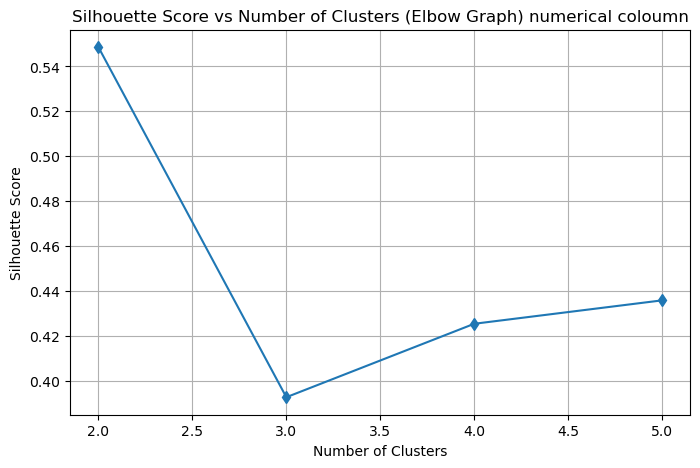

Optimal Number of clusters: 3


In [19]:
# Plotting the silhouette scores vs Number of clusters 
plt.figure(figsize=(8, 5))
plt.plot(range(2, 6), silhouette_scores, marker='d', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters (Elbow Graph) numerical coloumn')
plt.grid(True)
plt.show()

# Based on the silhouette score, we are chooseing the optimal number of clusters
optimal_k = range(2,6)[silhouette_scores.index(max(silhouette_scores))] +1
print("Optimal Number of clusters:", optimal_k)


In [20]:
# Performing the K-means clustering with Optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(standardized_numerical_data)

/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
# cluster labels assigned to each data point
kmeans.labels_

array([0, 0, 0, ..., 0, 2, 0], dtype=int32)

In [22]:
# To get silhouette score
silhouette_avg = silhouette_score(standardized_numerical_data, clusters_lables)

# printing the score 
print("Silhoutte score:", silhouette_avg)

Silhoutte score: 0.4358046949227148


In [40]:
from sklearn.decomposition import PCA
# Performing PCA for above clustering
pca = PCA(n_components=2)
pca_result = pca.fit_transform(standardized_numerical_data)

#printing the PCA
print(pca_result)

[[-1.36024579  1.37477577]
 [-0.38787474 -0.44605728]
 [ 0.79575424  0.95801126]
 ...
 [-0.42247428  0.8703586 ]
 [ 0.29297035 -0.60374223]
 [-1.24584919  1.16056011]]


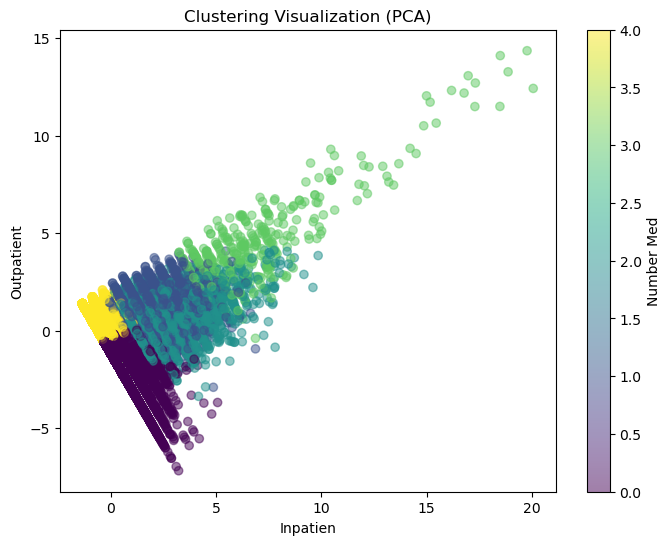

In [24]:
# Create scatter plot for the clustered data points
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters_lables, cmap='viridis', alpha=0.5)
plt.title('Clustering Visualization (PCA)')
plt.xlabel('Inpatien')
plt.ylabel('Outpatient')
plt.colorbar(label='Number Med')
plt.show()

In [25]:
# To perform K-mode clustering for Cateogarical data
# Define range of clusters to evaluate
# Calculate silhouette score for each k in range
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

# Choose a range of cluster numbers to evaluate
cluster_range = range(1, 11)

# Fitting the k_modes clustering for each cluster number in cost
costs = []
for num_clusters in cluster_range:
    kmode = KModes(n_clusters=num_clusters, init='Huang', n_init=5, verbose=0)
    kmode.fit_predict(encoded_categorical_data)
    costs.append(kmode.cost_)

In [26]:
#cost is the sum of squared distances of data points to their nearest cluster centroids.
kmode.cost_

18498.0

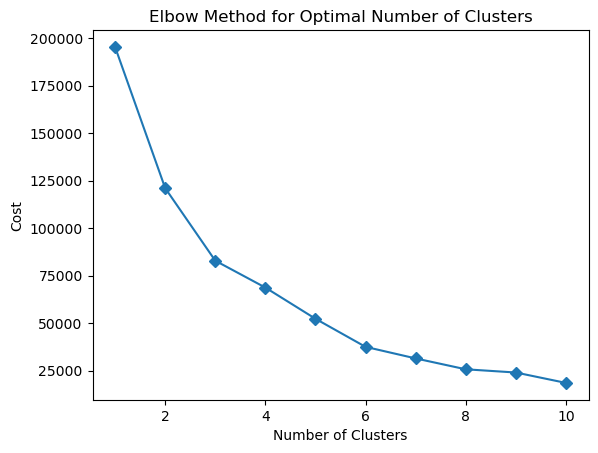

In [27]:
# Plotting the elbow graph for K-mode clustering 
plt.plot(cluster_range, costs, marker='D')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [64]:
# By the Elbow graph vewing the elbow ponit we can say that the 'optimal number of cluster is 2'
from kmodes.kmodes import KModes
# Performing the Kmode clustering for optimal number of clusters
kmode = KModes(n_clusters=2, init='Huang', n_init=5, verbose=0)
clusters = kmode.fit_predict(encoded_categorical_data)

# Printing the out put
print(clusters)

[0 1 0 ... 0 0 0]


In [29]:
# To combine the preprocessed numerical and categorical data
select_data = pd.concat([pd.DataFrame(standardized_numerical_data), encoded_categorical_data], axis=1)

# Printing the new standardized data 
print(select_data)

               0         1         2  readmitted_>30  readmitted_NO  \
0      -0.503276 -0.291461 -1.848268           False           True   
1      -0.503276 -0.291461  0.243390            True          False   
2       0.288579  1.286748 -0.371804           False           True   
3      -0.503276 -0.291461 -0.002688           False           True   
4      -0.503276 -0.291461 -0.986997           False           True   
...          ...       ...       ...             ...            ...   
101761 -0.503276 -0.291461 -0.002688            True          False   
101762  0.288579 -0.291461  0.243390           False           True   
101763 -0.503276  0.497643 -0.863958           False           True   
101764  0.288579 -0.291461  0.612506           False           True   
101765 -0.503276 -0.291461 -1.602190           False           True   

        diabetesMed_Yes  insulin_No  insulin_Steady  insulin_Up  
0                 False        True           False       False  
1              

In [31]:
# To get silhouette score for optimal number of clusters
from sklearn.metrics import silhouette_score
from kmodes.kprototypes import KPrototypes
silhouette_scores = []
for i in range(2, 11):
    kproto = KPrototypes(n_clusters=i, init='Cao', n_init=1, verbose=2)
    clusters = kproto.fit_predict(select_data, categorical=[3, 4, 5, 6, 7, 8])  # Adjust categorical indices as per your data
    silhouette_avg = silhouette_score(select_data, clusters)
    silhouette_scores.append(silhouette_avg)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 15924, ncost: 329571.0599344247
Run: 1, iteration: 2/100, moves: 5845, ncost: 328610.84602403233
Run: 1, iteration: 3/100, moves: 2125, ncost: 328460.1832223324
Run: 1, iteration: 4/100, moves: 66, ncost: 328458.8136167274
Run: 1, iteration: 5/100, moves: 12, ncost: 328458.73039968614
Run: 1, iteration: 6/100, moves: 0, ncost: 328458.73039968614


/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 20472, ncost: 274842.22019397304
Run: 1, iteration: 2/100, moves: 11460, ncost: 272384.12929125974
Run: 1, iteration: 3/100, moves: 2159, ncost: 272022.0975271194
Run: 1, iteration: 4/100, moves: 939, ncost: 271894.9528479593
Run: 1, iteration: 5/100, moves: 509, ncost: 271853.53672685317
Run: 1, iteration: 6/100, moves: 283, ncost: 271839.0933661027
Run: 1, iteration: 7/100, moves: 41, ncost: 271838.653770368
Run: 1, iteration: 8/100, moves: 22, ncost: 271838.0144795953
Run: 1, iteration: 9/100, moves: 14, ncost: 271837.81566166884
Run: 1, iteration: 10/100, moves: 0, ncost: 271837.81566166884


/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 22700, ncost: 262013.56374026925
Run: 1, iteration: 2/100, moves: 8837, ncost: 257270.41330980833
Run: 1, iteration: 3/100, moves: 5634, ncost: 255618.2332222309
Run: 1, iteration: 4/100, moves: 11714, ncost: 245407.5039486034
Run: 1, iteration: 5/100, moves: 12115, ncost: 235738.27230453002
Run: 1, iteration: 6/100, moves: 10673, ncost: 226665.76045379438
Run: 1, iteration: 7/100, moves: 4859, ncost: 224163.32853594268
Run: 1, iteration: 8/100, moves: 2887, ncost: 223505.2271492992
Run: 1, iteration: 9/100, moves: 1752, ncost: 223406.60732755024
Run: 1, iteration: 10/100, moves: 458, ncost: 223397.83781979178
Run: 1, iteration: 11/100, moves: 8, ncost: 223397.82440941874
Run: 1, iteration: 12/100, moves: 0, ncost: 223397.82440941874


/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 31749, ncost: 207042.85979022045
Run: 1, iteration: 2/100, moves: 8591, ncost: 202107.5191625074
Run: 1, iteration: 3/100, moves: 2534, ncost: 201617.57326180156
Run: 1, iteration: 4/100, moves: 1237, ncost: 201383.9514265874
Run: 1, iteration: 5/100, moves: 1699, ncost: 200783.69806054753
Run: 1, iteration: 6/100, moves: 2813, ncost: 198887.41020162523
Run: 1, iteration: 7/100, moves: 5629, ncost: 198564.87131026614
Run: 1, iteration: 8/100, moves: 2170, ncost: 198467.03312406715
Run: 1, iteration: 9/100, moves: 705, ncost: 198451.21122838854
Run: 1, iteration: 10/100, moves: 108, ncost: 198450.71691691814
Run: 1, iteration: 11/100, moves: 0, ncost: 198450.71691691814


/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 30225, ncost: 196375.56074176694
Run: 1, iteration: 2/100, moves: 15381, ncost: 186756.1952529218
Run: 1, iteration: 3/100, moves: 12571, ncost: 185223.3171957153
Run: 1, iteration: 4/100, moves: 2824, ncost: 185072.8694930093
Run: 1, iteration: 5/100, moves: 317, ncost: 185070.14204198506
Run: 1, iteration: 6/100, moves: 40, ncost: 185070.08769531624
Run: 1, iteration: 7/100, moves: 0, ncost: 185070.08769531624


/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 37291, ncost: 181523.27786522504
Run: 1, iteration: 2/100, moves: 9560, ncost: 179130.50390477938
Run: 1, iteration: 3/100, moves: 5511, ncost: 176954.29201417492
Run: 1, iteration: 4/100, moves: 1529, ncost: 176840.43907149302
Run: 1, iteration: 5/100, moves: 487, ncost: 176828.44901309782
Run: 1, iteration: 6/100, moves: 153, ncost: 176824.0106127233
Run: 1, iteration: 7/100, moves: 262, ncost: 176816.4241547554
Run: 1, iteration: 8/100, moves: 23, ncost: 176816.3103667413
Run: 1, iteration: 9/100, moves: 0, ncost: 176816.3103667413


/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 36618, ncost: 171531.5878697452
Run: 1, iteration: 2/100, moves: 12544, ncost: 167825.2178369201
Run: 1, iteration: 3/100, moves: 3885, ncost: 167138.1247206255
Run: 1, iteration: 4/100, moves: 3677, ncost: 166227.8947965601
Run: 1, iteration: 5/100, moves: 3828, ncost: 164985.61508019085
Run: 1, iteration: 6/100, moves: 5004, ncost: 163397.44705025753
Run: 1, iteration: 7/100, moves: 2792, ncost: 162672.63648174083
Run: 1, iteration: 8/100, moves: 1273, ncost: 162626.86676528704
Run: 1, iteration: 9/100, moves: 368, ncost: 162614.25498731676
Run: 1, iteration: 10/100, moves: 1055, ncost: 162550.1127991269
Run: 1, iteration: 11/100, moves: 1506, ncost: 162484.18740165784
Run: 1, iteration

/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 24643, ncost: 168794.9315185533
Run: 1, iteration: 2/100, moves: 13117, ncost: 160925.88983341752
Run: 1, iteration: 3/100, moves: 15291, ncost: 153591.69052762265
Run: 1, iteration: 4/100, moves: 9263, ncost: 151190.2127784923
Run: 1, iteration: 5/100, moves: 4945, ncost: 149833.6070606261
Run: 1, iteration: 6/100, moves: 3864, ncost: 148796.1107592563
Run: 1, iteration: 7/100, moves: 6850, ncost: 144651.0310473499
Run: 1, iteration: 8/100, moves: 8418, ncost: 143675.59307655174
Run: 1, iteration: 9/100, moves: 2107, ncost: 143476.3250941896
Run: 1, iteration: 10/100, moves: 4202, ncost: 140694.3853955643
Run: 1, iteration: 11/100, moves: 7077, ncost: 140481.28476218547
Run: 1, iteration: 12/100, moves: 1457, ncost: 140417.85280106982
Run: 1, iteration: 13/100, moves: 926, ncost: 140390.17899637576


/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 45267, ncost: 150715.07034304904
Run: 1, iteration: 2/100, moves: 17037, ncost: 139060.54546631157
Run: 1, iteration: 3/100, moves: 8621, ncost: 135003.03223230413
Run: 1, iteration: 4/100, moves: 4773, ncost: 133240.92164797062
Run: 1, iteration: 5/100, moves: 3570, ncost: 132632.6445886148
Run: 1, iteration: 6/100, moves: 1114, ncost: 132588.8420800077
Run: 1, iteration: 7/100, moves: 193, ncost: 132584.5936211009
Run: 1, iteration: 8/100, moves: 4, ncost: 132584.58977875957
Run: 1, iteration: 9/100, moves: 0, ncost: 132584.58977875957


/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


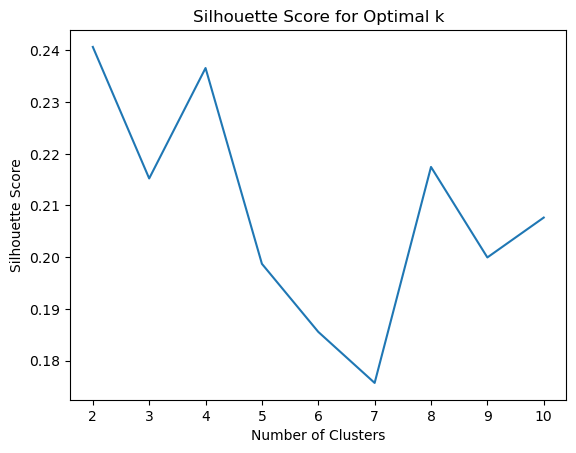

Optimal Number of clusters: 3


In [32]:
# Plotting the silhouette scores vs Number of clusters 
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Based on the silhouette score, we are chooseing the optimal number of clusters
optimal_k = range(2,6)[silhouette_scores.index(max(silhouette_scores))] +1
print("Optimal Number of clusters:", optimal_k)

In [33]:
# To get silhouette score
silhouette_avg = silhouette_score(select_data, clusters_lables)

# printing the score 
print("Silhoutte score:", silhouette_avg)

/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Silhoutte score: 0.24268347317880387


In [34]:
from kmodes.kprototypes import KPrototypes

# Performing K-Prototype clustering for optimal number of cluster
kproto = KPrototypes(n_clusters=3, init='Cao', verbose=2)
clusters = kproto.fit_predict(select_data, categorical=[3, 4, 5, 6, 7, 8])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 29984, ncost: 289294.3201686993
Run: 1, iteration: 2/100, moves: 18150, ncost: 274952.1716634604
Run: 1, iteration: 3/100, moves: 6802, ncost: 272604.28915407206
Run: 1, iteration: 4/100, moves: 3150, ncost: 271892.7189310517
Run: 1, iteration: 5/100, moves: 1116, ncost: 271721.8313881263
Run: 1, iteration: 6/100, moves: 525, ncost: 271663.08783632016
Run: 1, iteration: 7/100, moves: 192, ncost: 271656.2651331604
Run: 1, iteration: 8/100, moves: 85, ncost: 271654.7081935181
Run: 1, iteration: 9/100, moves: 0, ncost: 271654.7081935181
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 17166, ncost: 304080.84037971793
Run: 2, iteration: 2/100, moves: 9843, ncost: 299433.09673189174
Run: 2, iteration: 3/100, moves: 11774, ncost: 292113.332872

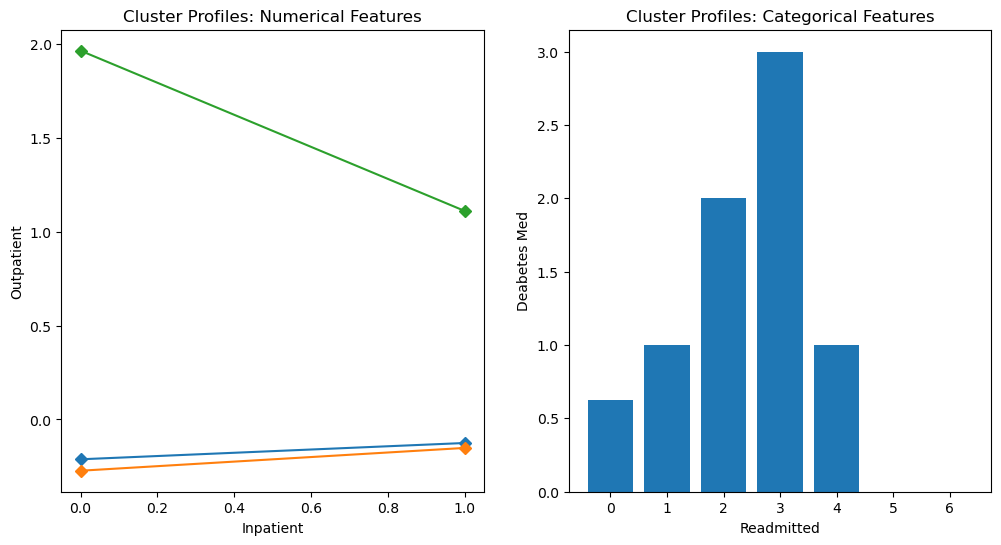

In [35]:
# Cluster profiles for K-Prototype clustering 
cluster_centers_numerical = kproto.cluster_centroids_[:, :2]  # Numerical Column
cluster_centers_categorical = kproto.cluster_centroids_[:, 2:]  # Categorical column

# Plot cluster profiles for numerical features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cluster_centers_numerical.T, marker='D')
plt.title('Cluster Profiles: Numerical Features')
plt.xlabel('Inpatient')
plt.ylabel('Outpatient')

# Plot cluster profiles for categorical features
plt.subplot(1, 2, 2)
plt.bar(np.arange(cluster_centers_categorical.shape[1]), np.sum(cluster_centers_categorical, axis=0))
plt.title('Cluster Profiles: Categorical Features')
plt.xlabel('Readmitted')
plt.ylabel('Deabetes Med')
plt.show()

/Users/luffy_015/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

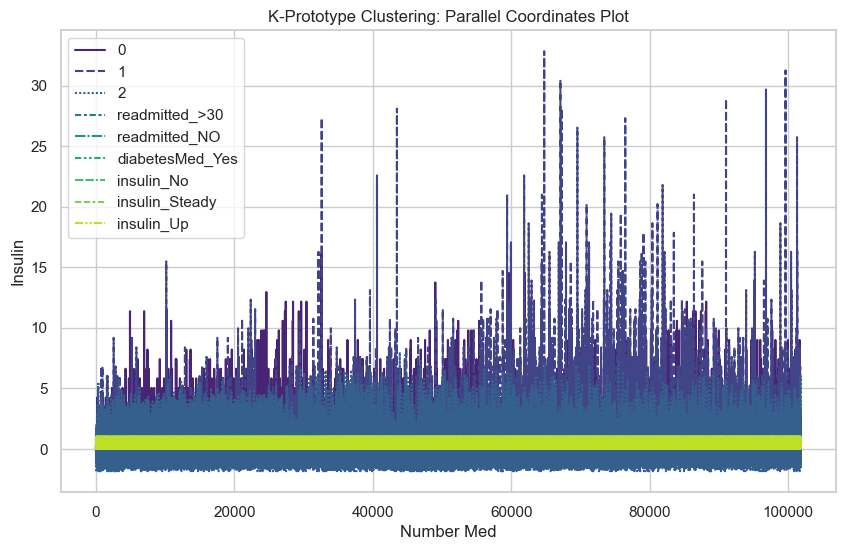

In [36]:
# Parallel coordinates plot for K-Prototype
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.lineplot(data=select_data, palette='viridis')
plt.title('K-Prototype Clustering: Parallel Coordinates Plot')
plt.xlabel('Number Med')
plt.ylabel('Insulin')
plt.show()

/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


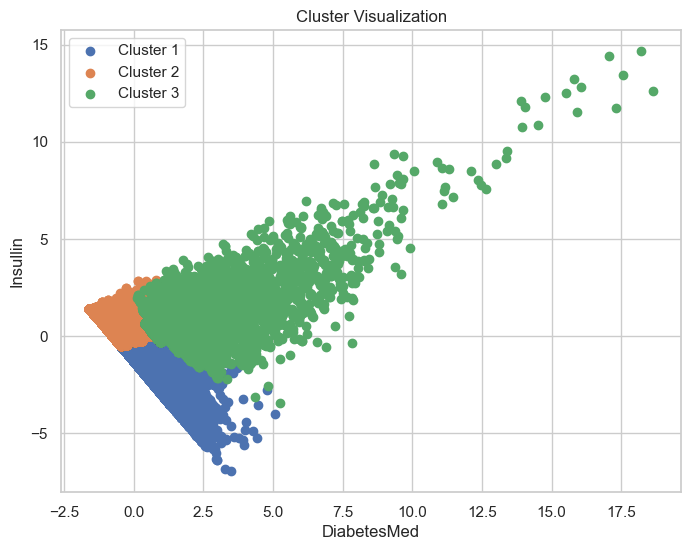

In [66]:
# Reduce dimensionality using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(select_data)

# Visualize the clusters
plt.figure(figsize=(8, 6))

for cluster_label in range(3):
    plt.scatter(reduced_data[clusters == cluster_label, 0],
                reduced_data[clusters == cluster_label, 1],
                label=f'Cluster {cluster_label + 1}')

plt.title('Cluster Visualization')
plt.xlabel('DiabetesMed')
plt.ylabel('Insullin')
plt.legend()
plt.show()

/Users/luffy_015/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/luffy_015/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

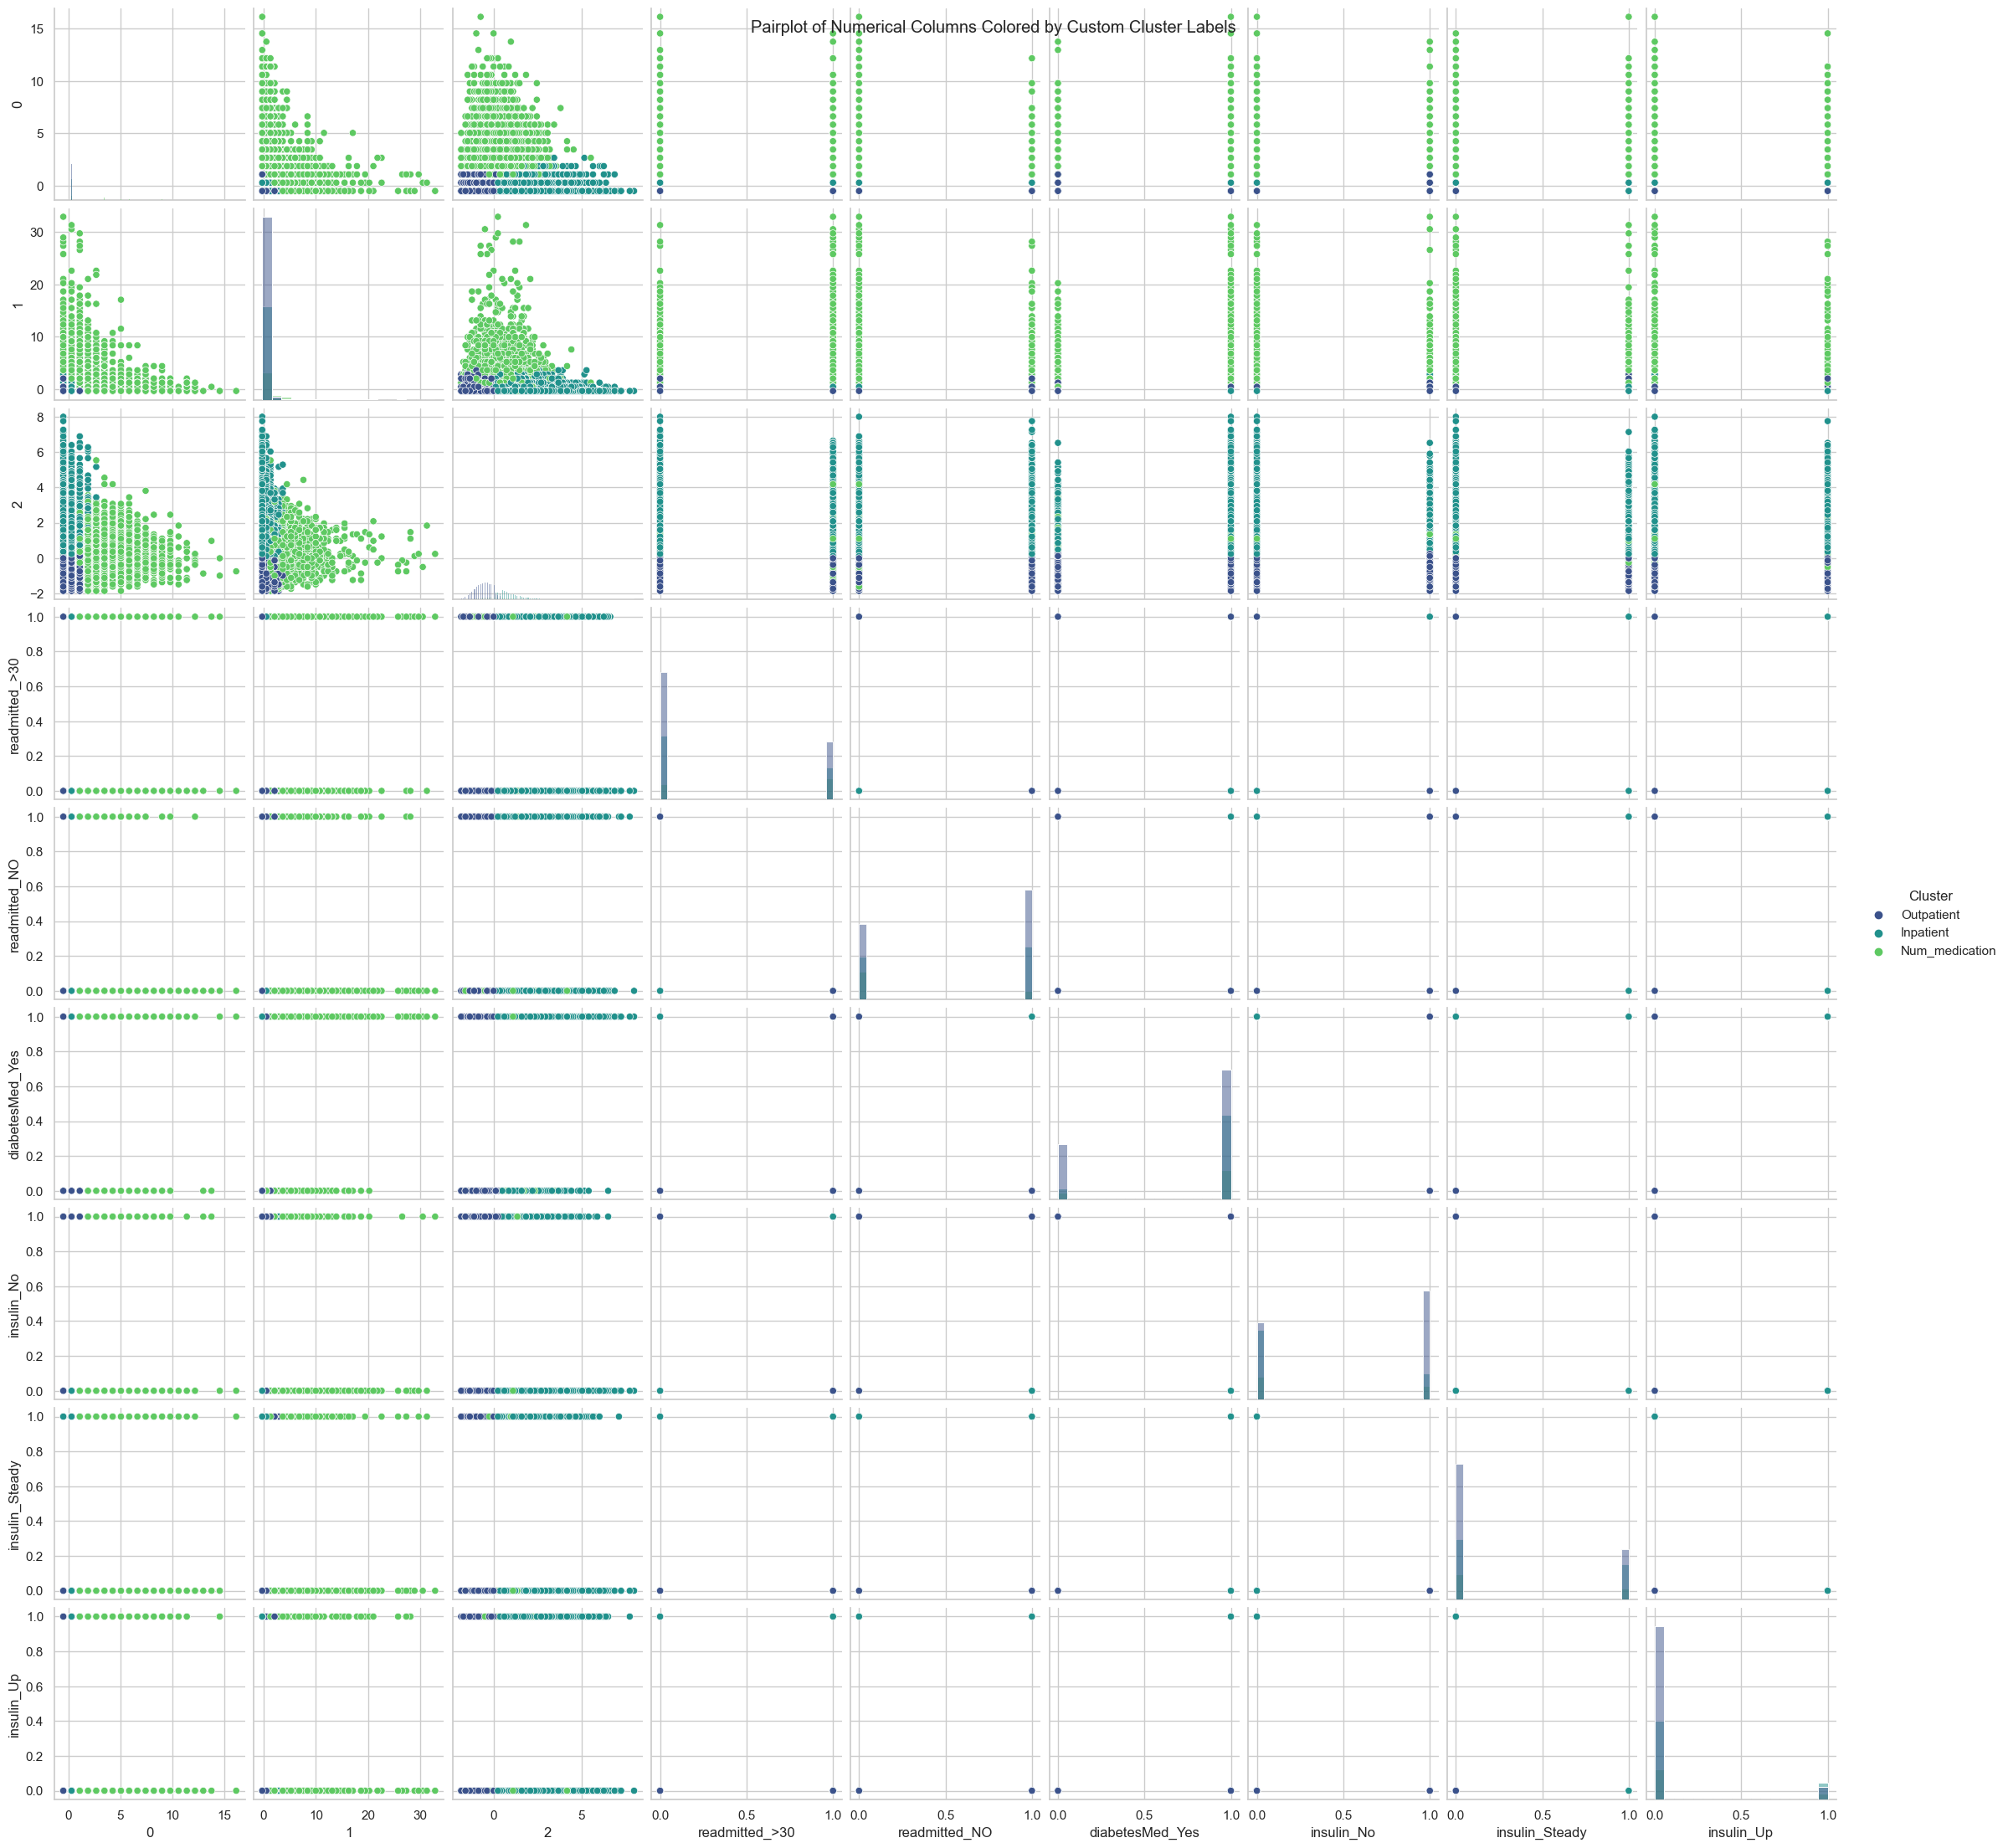

In [65]:
# Adding the cluster assignments to the data
cluster_data = select_data.copy()
cluster_data['Cluster'] = clusters

# Perform mapping from original cluster labels 
# we are maping:
# 0 -> 'Inpatient'
# 1 -> 'Outpatient'
# 2 -> 'Num_medication'
cluster_labels_mapping = {0: 'Inpatient', 1: 'Outpatient', 2: 'Num_medication'}

# Apply the mapping to the 'Cluster' column
cluster_data['Cluster'] = cluster_data['Cluster'].map(cluster_labels_mapping)

# Now, when you visualize, the plots will use your custom labels
sns.pairplot(cluster_data, hue='Cluster', palette='viridis', diag_kind='hist')
plt.suptitle('Pairplot of Numerical Columns Colored by Custom Cluster Labels')
plt.show()